### Heat Map ver.2
----
#### What's new: design refinement

In [1]:
# Import Library

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# Set Config
CONFIG = {
    "data_dir": "./TPM.csv"
    , "genes": ["GADD45G", "CDC25B", "NCAM1", "GRM4", "NGFR", "MAPK14"]
    , "color": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "cbar": {"shrink": 1}
}

In [3]:
# Load Data
rawdata = pd.read_csv(CONFIG['data_dir'], index_col=0)

In [4]:
# Shape Data
data = np.log2(rawdata+1)
data.index.name=None

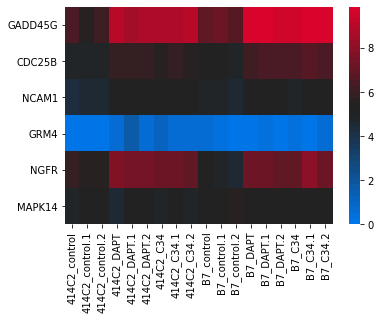

In [5]:
# TPM heatmap
hTPM = data.loc[CONFIG["genes"], :]
sns.heatmap(hTPM, cmap=CONFIG["color"], robust=True, center=hTPM.mean().mean(), cbar=True, cbar_kws=CONFIG["cbar"])
plt.savefig("./HeatMap_TPM_ver2.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

In [6]:
# Calculating Z score
Zdata = data.loc[CONFIG["genes"], :].T.apply(zscore).T

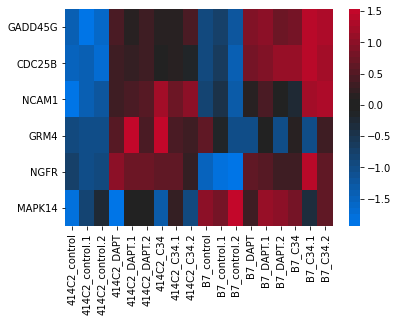

In [7]:
# Z score heat map
sns.heatmap(Zdata, cmap=CONFIG["color"], robust=True, center=0, cbar=True, cbar_kws=CONFIG["cbar"])
plt.savefig("./HeatMap_Zscore_ver2.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)